In [67]:
import pandas as pd

In [68]:
names = ["age", "sector", "education", "marital-status", "occupation", "race", "sex", "hours-per-week", "country-of-origin", "target"]

In [69]:
data = pd.read_csv("income.train.txt.5k", names = names)

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(data)

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [72]:
binary_data = encoder.transform(data)

In [73]:
feature_names = encoder.get_feature_names_out()
feature_names

array(['age_17', 'age_18', 'age_19', 'age_20', 'age_21', 'age_22',
       'age_23', 'age_24', 'age_25', 'age_26', 'age_27', 'age_28',
       'age_29', 'age_30', 'age_31', 'age_32', 'age_33', 'age_34',
       'age_35', 'age_36', 'age_37', 'age_38', 'age_39', 'age_40',
       'age_41', 'age_42', 'age_43', 'age_44', 'age_45', 'age_46',
       'age_47', 'age_48', 'age_49', 'age_50', 'age_51', 'age_52',
       'age_53', 'age_54', 'age_55', 'age_56', 'age_57', 'age_58',
       'age_59', 'age_60', 'age_61', 'age_62', 'age_63', 'age_64',
       'age_65', 'age_66', 'age_67', 'age_68', 'age_69', 'age_70',
       'age_71', 'age_72', 'age_73', 'age_74', 'age_75', 'age_76',
       'age_77', 'age_78', 'age_79', 'age_80', 'age_81', 'age_88',
       'age_90', 'sector_ Federal-gov', 'sector_ Local-gov',
       'sector_ Private', 'sector_ Self-emp-inc',
       'sector_ Self-emp-not-inc', 'sector_ State-gov',
       'sector_ Without-pay', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'e

In [74]:
count = len(feature_names)
count

232

In [75]:
# Import dev data
data_dev = pd.read_csv("income.dev.txt", names = names)

In [76]:
binary_data_dev = encoder.transform(data_dev)
feature_names = encoder.get_feature_names_out()
feature_names

array(['age_17', 'age_18', 'age_19', 'age_20', 'age_21', 'age_22',
       'age_23', 'age_24', 'age_25', 'age_26', 'age_27', 'age_28',
       'age_29', 'age_30', 'age_31', 'age_32', 'age_33', 'age_34',
       'age_35', 'age_36', 'age_37', 'age_38', 'age_39', 'age_40',
       'age_41', 'age_42', 'age_43', 'age_44', 'age_45', 'age_46',
       'age_47', 'age_48', 'age_49', 'age_50', 'age_51', 'age_52',
       'age_53', 'age_54', 'age_55', 'age_56', 'age_57', 'age_58',
       'age_59', 'age_60', 'age_61', 'age_62', 'age_63', 'age_64',
       'age_65', 'age_66', 'age_67', 'age_68', 'age_69', 'age_70',
       'age_71', 'age_72', 'age_73', 'age_74', 'age_75', 'age_76',
       'age_77', 'age_78', 'age_79', 'age_80', 'age_81', 'age_88',
       'age_90', 'sector_ Federal-gov', 'sector_ Local-gov',
       'sector_ Private', 'sector_ Self-emp-inc',
       'sector_ Self-emp-not-inc', 'sector_ State-gov',
       'sector_ Without-pay', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'e

In [77]:
count = len(feature_names)
count

232

In [78]:
# KNN

In [79]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [80]:
# Seperate the data as X_train, y_train
X_train = binary_data[:,:-2] # Excluding the last two columns which are for the target in binary format
y_train = (data["target"].str.strip() == '>50K').astype(int).values

X_dev = binary_data_dev[:,:-2]
y_dev = (data_dev["target"].str.strip() == '>50K').astype(int).values

In [81]:
print(X_train.shape)
print(X_dev.shape)


(5000, 230)
(1000, 230)


In [82]:
training_error_rates = []
dev_error_rates = []
training_positive_rates = []
dev_positive_rates = []

In [85]:
import time

training_times = []

for k in range(1, 101, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    start_time = time.time()  # start the timer
    
    knn.fit(X_train, y_train)

    end_time = time.time()  # end the timer
    
    train_preds = knn.predict(X_train)
    dev_preds = knn.predict(X_dev)
    
    train_error_rate = 1 - accuracy_score(y_train, train_preds)
    dev_error_rate = 1 - accuracy_score(y_dev, dev_preds)
    
    training_error_rates.append(train_error_rate)
    dev_error_rates.append(dev_error_rate)

    training_duration = end_time - start_time  # compute the training time for this iteration
    training_times.append(training_duration)
    
    print(f"k={k}: Training Error Rate = {train_error_rate:.4f}, Dev Error Rate = {dev_error_rate:.4f}")

k=1: Training Error Rate = 0.0152, Dev Error Rate = 0.2320
k=3: Training Error Rate = 0.1150, Dev Error Rate = 0.1800
k=5: Training Error Rate = 0.1438, Dev Error Rate = 0.1650
k=7: Training Error Rate = 0.1548, Dev Error Rate = 0.1690
k=9: Training Error Rate = 0.1656, Dev Error Rate = 0.1610
k=11: Training Error Rate = 0.1694, Dev Error Rate = 0.1680
k=13: Training Error Rate = 0.1672, Dev Error Rate = 0.1650
k=15: Training Error Rate = 0.1702, Dev Error Rate = 0.1630
k=17: Training Error Rate = 0.1702, Dev Error Rate = 0.1630
k=19: Training Error Rate = 0.1710, Dev Error Rate = 0.1610
k=21: Training Error Rate = 0.1724, Dev Error Rate = 0.1620
k=23: Training Error Rate = 0.1754, Dev Error Rate = 0.1600
k=25: Training Error Rate = 0.1744, Dev Error Rate = 0.1620
k=27: Training Error Rate = 0.1746, Dev Error Rate = 0.1620
k=29: Training Error Rate = 0.1776, Dev Error Rate = 0.1640
k=31: Training Error Rate = 0.1772, Dev Error Rate = 0.1580
k=33: Training Error Rate = 0.1758, Dev Error

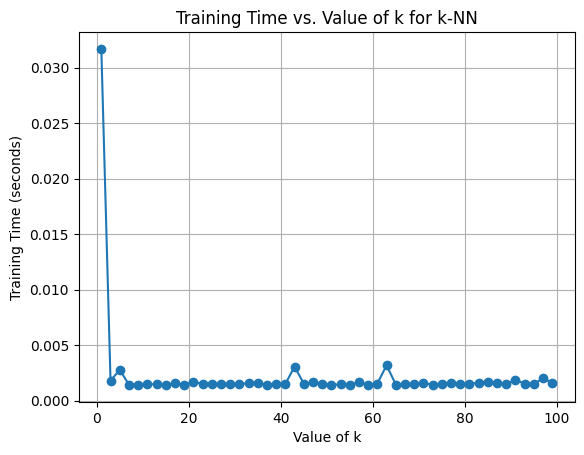

In [86]:
import matplotlib.pyplot as plt

ks = list(range(1, 100, 2))
plt.plot(ks, training_times, marker='o', linestyle='-')
plt.xlabel('Value of k')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Value of k for k-NN')
plt.grid(True)
plt.show()
